# __SUPERSTORE ANALYSIS__

_Retail dataset of a global superstore for 4 years. Perform Exploratory Data Analysis. Here are the steps that you can follow for univariate and bivariate data analysis on the SuperStore sales dataset:_

---

In [15]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
superstore = pd.read_csv('train.csv')

# Univariate Analysis:
---

## 1. Understand Dataset:
Explore the structure of the dataset, including the number of rows and columns.

In [17]:
superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


## 2. Data Cleaning:
Handle missing values, if any, and check for any anomalies in the data.

In [18]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [19]:
superstore['Postal Code'] = superstore['Postal Code'].astype('str')

11th col. `Postal Code` have 11 nulll values

In [20]:
superstore['Postal Code'].isna().value_counts()

Postal Code
False    9800
Name: count, dtype: int64

In [21]:
superstore[superstore['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


Through internet search we get the postal code for __'Burlington,Vermont,USA'__ is  __05401__, lets impute it

In [22]:
superstore.loc[superstore['Postal Code'].isna(), 'Postal Code'] = '5401'

## 3. Data Types:
Check the data types of each column. Ensure they are appropriate for the analysis.

In [23]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [24]:
superstore['Row ID'] = superstore['Row ID'].astype('str')
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], format='%d/%m/%Y')
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'], format='%d/%m/%Y')


## 4. Descriptive Statistics:
Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).

In [25]:
superstore.Sales.describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

## 5. Histograms:
Create histograms to visualize the distribution of key numeric variables.

In [148]:
superstore.Sales.quantile(0.95)

959.984

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


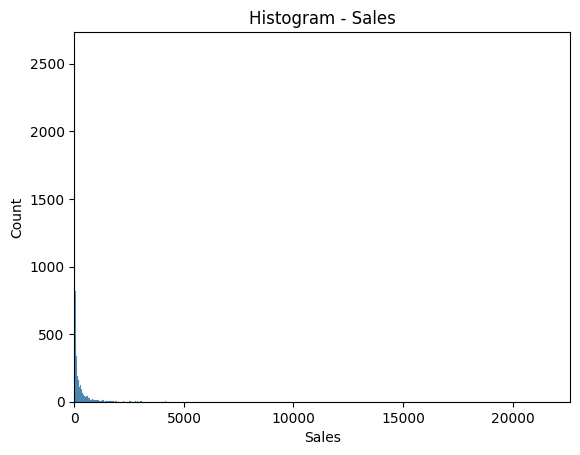

In [135]:
sns.histplot(superstore.Sales).set(xlim = (0, 22639), title = 'Histogram - Sales');

## 6. Time Series Plots:
Plot time series graphs to understand the trends and patterns in sales over the 4-year period.

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Sales Over 4 Year Period')

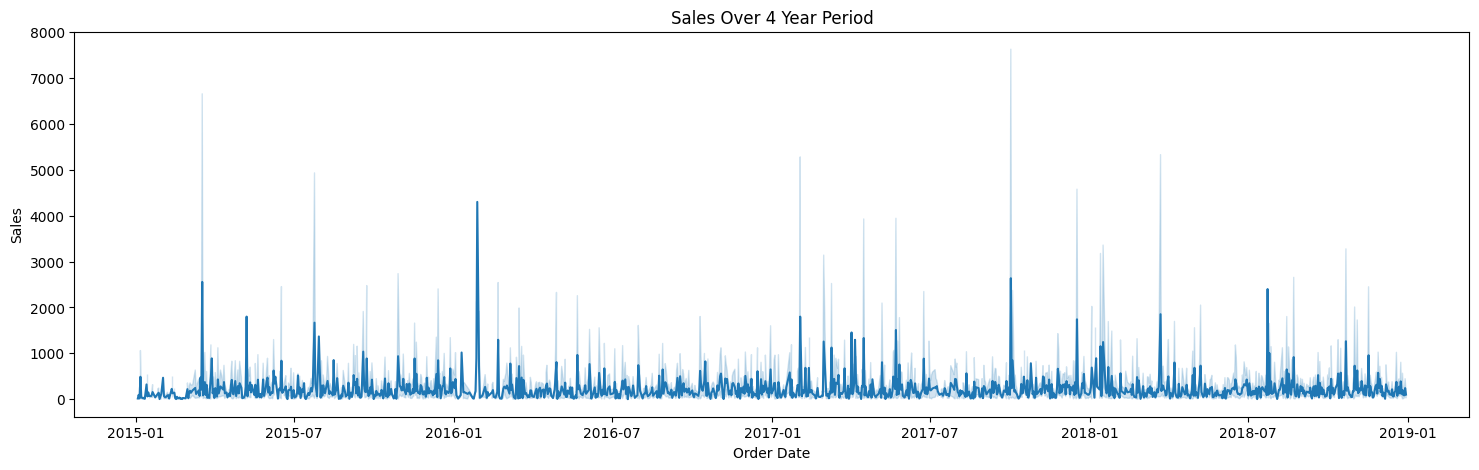

In [27]:
plt.figure(figsize=(18,5))
sns.plotting_context({'axes.titlesize': 'large'})
sns.lineplot(x=superstore['Order Date'], y=superstore['Sales']).set_title('Sales Over 4 Year Period')

## 7. Seasonal Decomposition:
Decompose time series data into components like trend, seasonality, and residuals for deeper insights.

Preparing Sales Time Series for decomposition

In [28]:
# unresampled time  series
sales_time_series = pd.DataFrame({'Ship Date': superstore['Ship Date'], 'Sales': superstore['Sales']}).set_index('Ship Date')
sales_time_series.sort_index(inplace=True)

After monthly resampling of time series and aggregating `Sales` by sum


In [29]:
monthly_sales_time_series = sales_time_series.resample('M').sum()
monthly_sales_time_series

,Sales
Ship Date,
2015-01-31,13243.9430
2015-02-28,5406.5280
2015-03-31,50553.7250
2015-04-30,29669.3870
2015-05-31,22474.8960
2015-06-30,35719.4636
2015-07-31,32825.7440
2015-08-31,29453.3100
2015-09-30,73126.6533


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


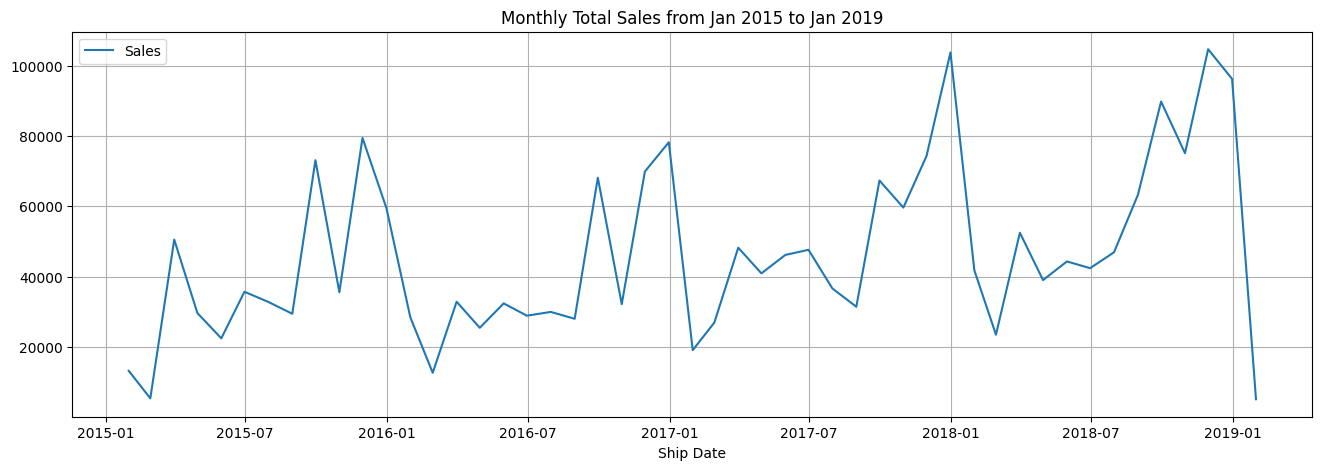

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(16,5))
plt.grid(True)
sns.lineplot(monthly_sales_time_series).set_title('Monthly Total Sales from Jan 2015 to Jan 2019');

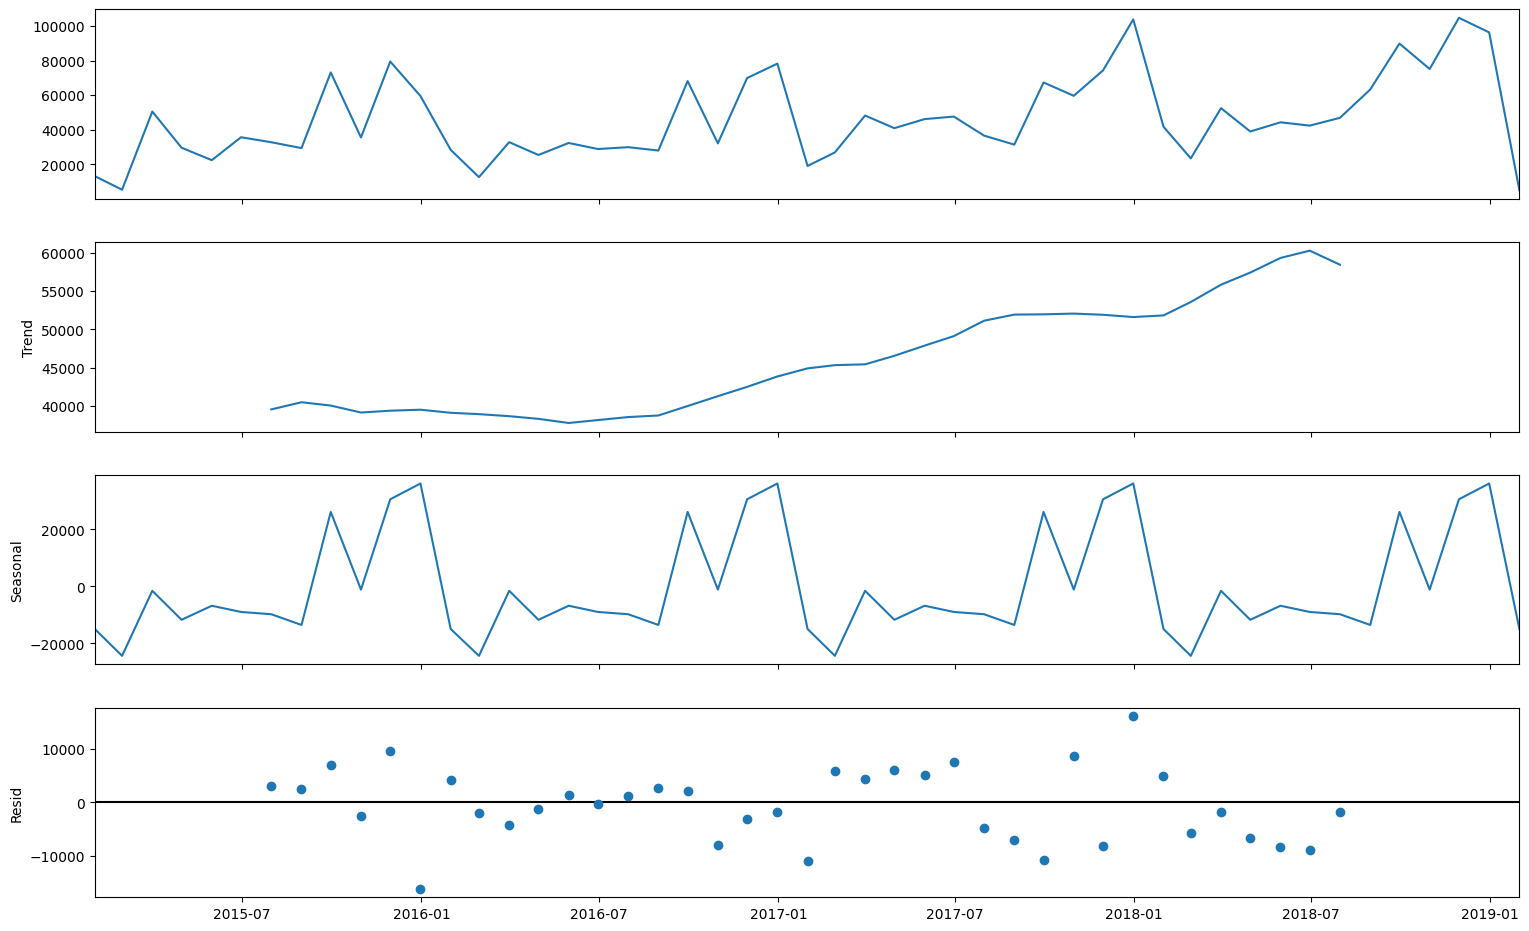

In [31]:
result = seasonal_decompose(monthly_sales_time_series, model='additive')
result.plot().set_size_inches((18,10));

## 8. Box Plots:
Use box plots to identify outliers and understand the distribution of numeric variables.

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


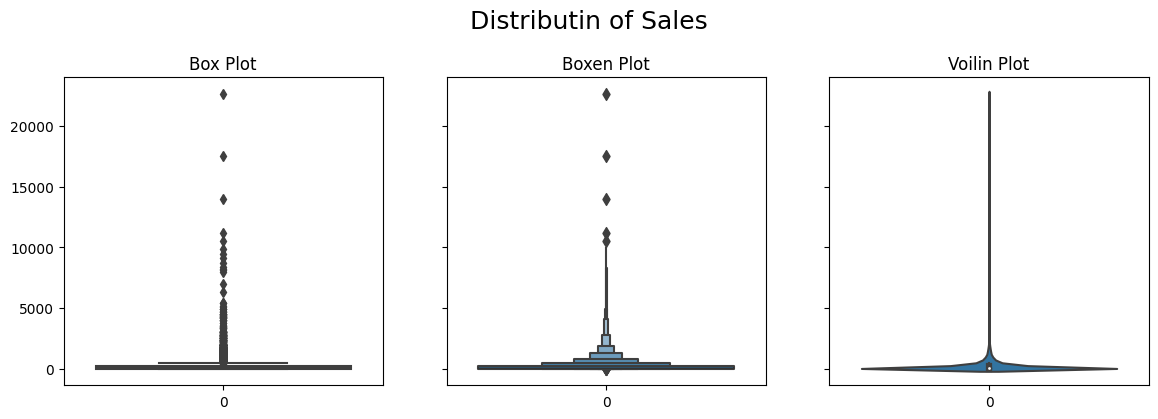

In [156]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14,4))
fig.suptitle('Distributin of Sales', size=18, y=1.05)
sns.boxplot(data=superstore.Sales, ax=axes[0]).set_title('Box Plot');
sns.boxenplot(data=superstore.Sales, ax=axes[1]).set_title('Boxen Plot');
sns.violinplot(data=superstore.Sales, ax=axes[2]).set_title('Voilin Plot');


## 9. Sales Distribution by Category:
Visualize the distribution of sales across different categories using bar charts or pie charts.

In [33]:
data = superstore.groupby('Category')['Sales'].sum().sort_values(ascending=False)
data

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

<Figure size 100x100 with 0 Axes>

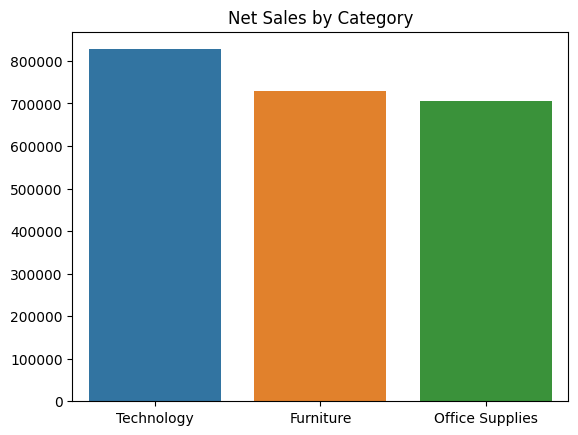

<Figure size 100x100 with 0 Axes>

In [34]:
sns.barplot(x=data.index, y=data.values).set_title('Net Sales by Category');
plt.xlabel('')
plt.figure(figsize = (1,1))

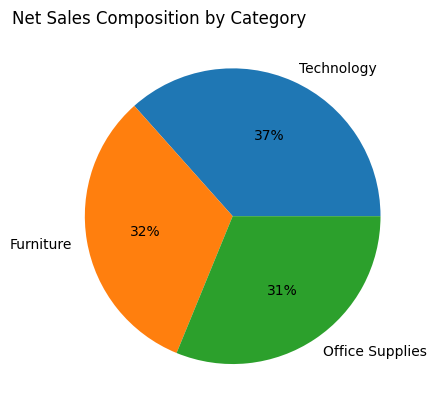

In [35]:
plt.pie(data, labels=data.index, autopct='%.0f%%');
plt.title('Net Sales Composition by Category', x=0.3);
plt.show()

## 10. Sales Variation Over Time:
Plot line charts to observe how sales vary over different time periods (months, quarters, years).

In [36]:
sales_time_series

,Sales
Ship Date,
2015-01-07,16.448
2015-01-07,12.780
2015-01-08,3.540
2015-01-08,19.440
2015-01-08,11.784
...,...
2019-01-04,33.264
2019-01-04,14.850
2019-01-04,72.450


__Monthly Variation__

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Monthly Total Sales from Jan 2015 to Jan 2019')

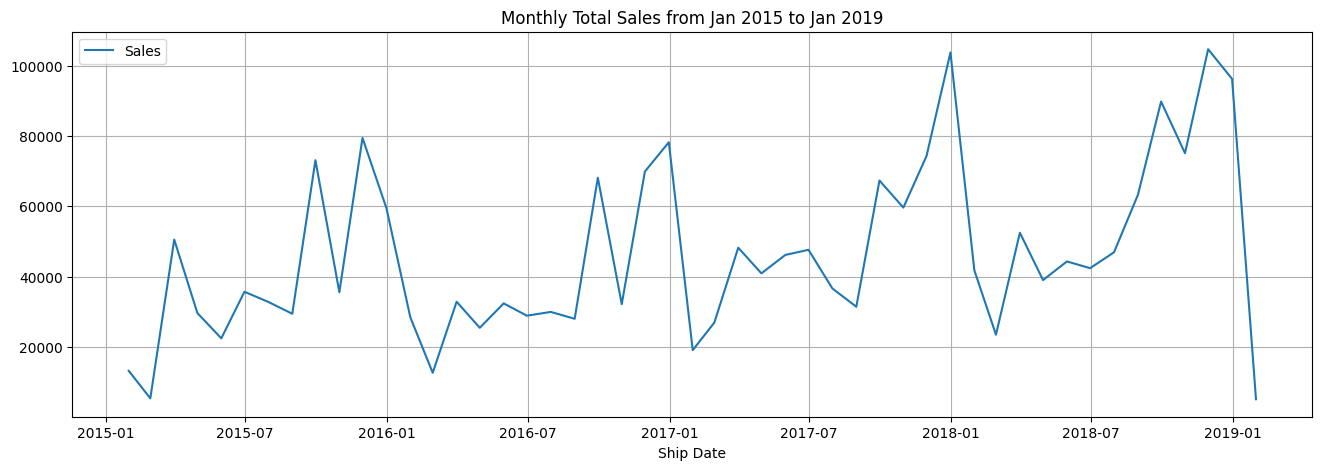

In [37]:
plt.figure(figsize=(16,5))
plt.grid(True)
sns.lineplot(monthly_sales_time_series).set_title('Monthly Total Sales from Jan 2015 to Jan 2019')

__Quarterly Variation__

In [38]:
quarterly_sales_time_series = sales_time_series.resample('Q').sum()
quarterly_sales_time_series

,Sales
Ship Date,
2015-03-31,69204.1960
2015-06-30,87863.7466
2015-09-30,135405.7073
2015-12-31,174568.2232
2016-03-31,73999.4780
2016-06-30,86803.5330
2016-09-30,126172.6982
2016-12-31,180326.6792
2017-03-31,94322.8760


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Quarterly Total Sales from 31st March 2015 to 31st March 2019')

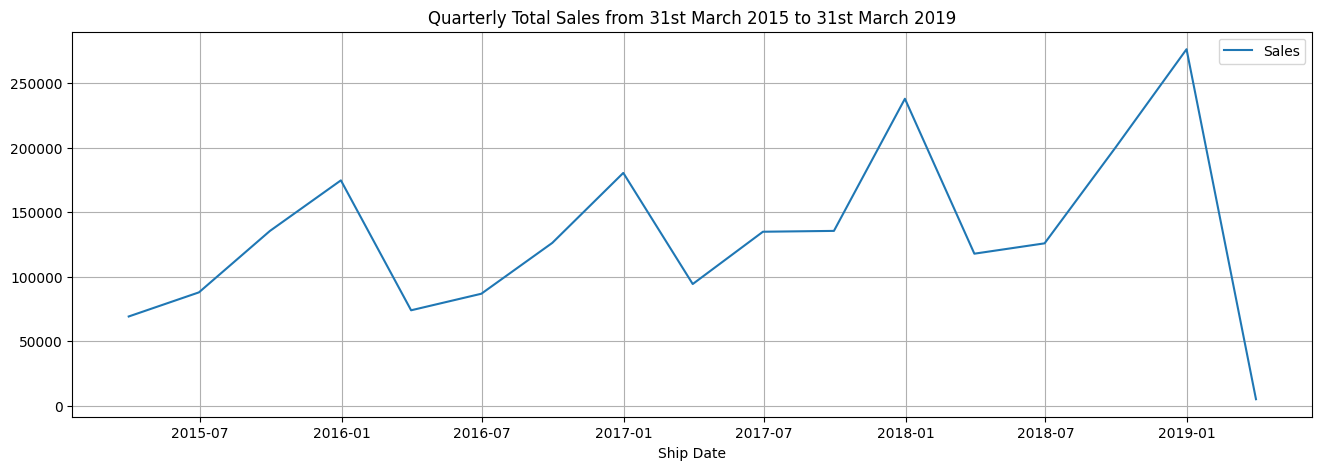

In [39]:
plt.figure(figsize=(16,5))
plt.grid(True)
sns.lineplot(quarterly_sales_time_series).set_title('Quarterly Total Sales from 31st March 2015 to 31st March 2019')

__Yearly Variation__

In [40]:
yearly_sales_time_series = sales_time_series.resample('A').sum()
yearly_sales_time_series

,Sales
Ship Date,
2015-12-31,467041.8731
2016-12-31,467302.3884
2017-12-31,602306.3450
2018-12-31,719726.4794
2019-12-31,5159.6968


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Yearly Total Sales from 2015 to 2019')

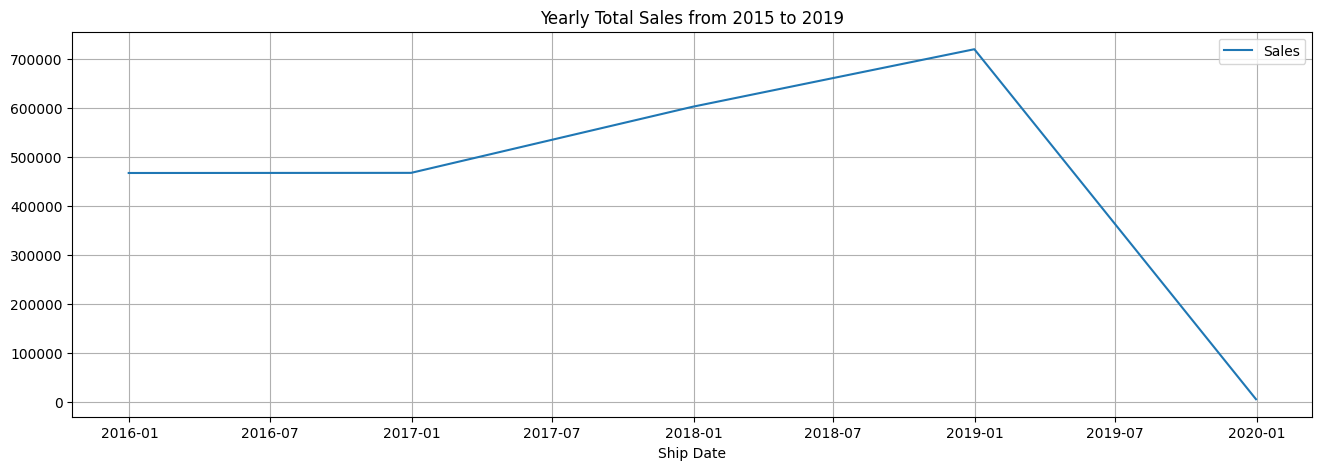

In [41]:
plt.figure(figsize=(16,5))
plt.grid(True)
sns.lineplot(yearly_sales_time_series).set_title('Yearly Total Sales from 2015 to 2019')

# Bivariate Analysis:
---

## 1. Correlation Analysis:
Examine the correlation between sales and other relevant numeric variables

___No Correlation as there is no other numeric variable in the dataset___

## 2. Scatter Plots:
Plot scatter plots to explore the relationship between sales and another numeric variabl

___No Scatter Plot can be plotted as there is no other numeric variable in the dataset___

## 3. Pair Plots:
Use pair plots for a quick overview of relationships between multiple numeric variables.

___No Pair Plot can be plotted as there is no other numeric variable in the dataset___

## 4. Category-wise Sales Trends:
Analyze how sales trends differ across different categories using line charts.

___Already Done in 1st Section: Univariate Analysis, Part 9: Sales Distribution by Category___

## 5. Heatmaps:
Create heatmaps to visualize the correlation matrix for better insights.

___No Heat Map can be plotted as there is no other numeric variable in the dataset___

## 6. Sales by Region:
Compare sales across different regions using bar charts or stacked bar charts.

In [42]:
sales_by_region = superstore.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_by_region

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

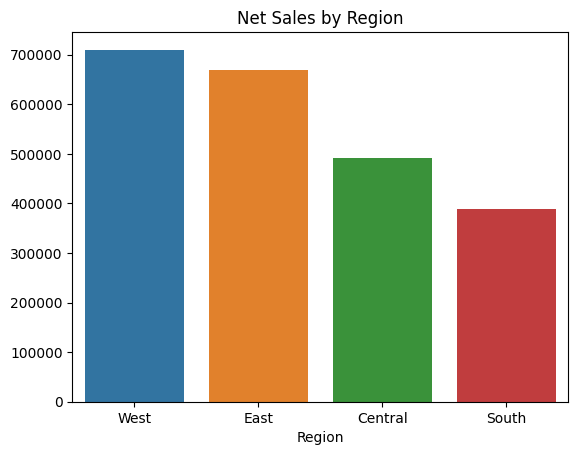

In [43]:
sns.barplot(x=sales_by_region.index, y=sales_by_region.values).set_title('Net Sales by Region');

## 7. Customer Segment Analysis:
Explore sales trends for different customer segments using line charts or bar charts

In [44]:
sales_by_segment = superstore.groupby('Segment')['Sales'].sum()
sales_by_segment

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

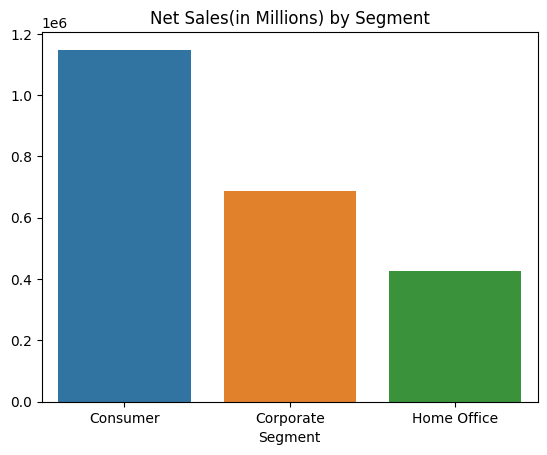

In [45]:
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values).set_title('Net Sales(in Millions) by Segment');

## 8. Sales vs. Quantity:
Investigate the relationship between sales and quantity sold using scatter plots.

Error: No `Quantity` column present in dataset

## 9. Customer Segment vs. Quantity:
Compare the quantity sold across different customer segments using bar charts.

Error: No `Quantity` column present in dataset

## 10. Discount Impact on Sales:
Analyze the impact of discounts on sales using bar charts or line charts.

Error: No ___Discount___ column present in dataset

## 11. Shipping Mode vs. Sales:
Explore the relationship between shipping modes and sales using categorical plots.

In [46]:
superstore['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [47]:
sales_by_shipmode = superstore.groupby('Ship Mode').agg({'Sales': ['sum', 'mean']})
print(sales_by_shipmode.columns)
sales_by_shipmode.sort_values(by=('Sales', 'sum'), ascending=False, inplace=True)
sales_by_shipmode
# sales_by_shipmode['Sales']['sum']
# sales_by_shipmode.values[:, 0]

MultiIndex([('Sales',  'sum'),
            ('Sales', 'mean')],
           )


Sales            
                         sum        mean
Ship Mode                               
Standard Class  1.340831e+06  228.849856
Second Class    4.499142e+05  236.547939
First Class     3.455723e+05  230.228020
Same Day        1.252190e+05  232.749143

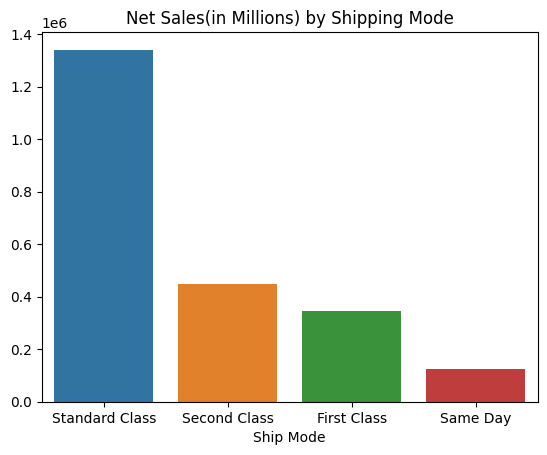

In [48]:
sns.barplot(x=sales_by_shipmode.index, y=sales_by_shipmode.values[:, 0]).set_title('Net Sales(in Millions) by Shipping Mode');

## 12. Product-wise Sales Analysis:
Investigate how sales vary for different products or categories using bar charts or line charts.

In [49]:
sales_by_product = superstore.groupby('Sub-Category')['Sales'].sum()
sales_by_product.sort_values(ascending=False, inplace=True)
sales_by_product

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64

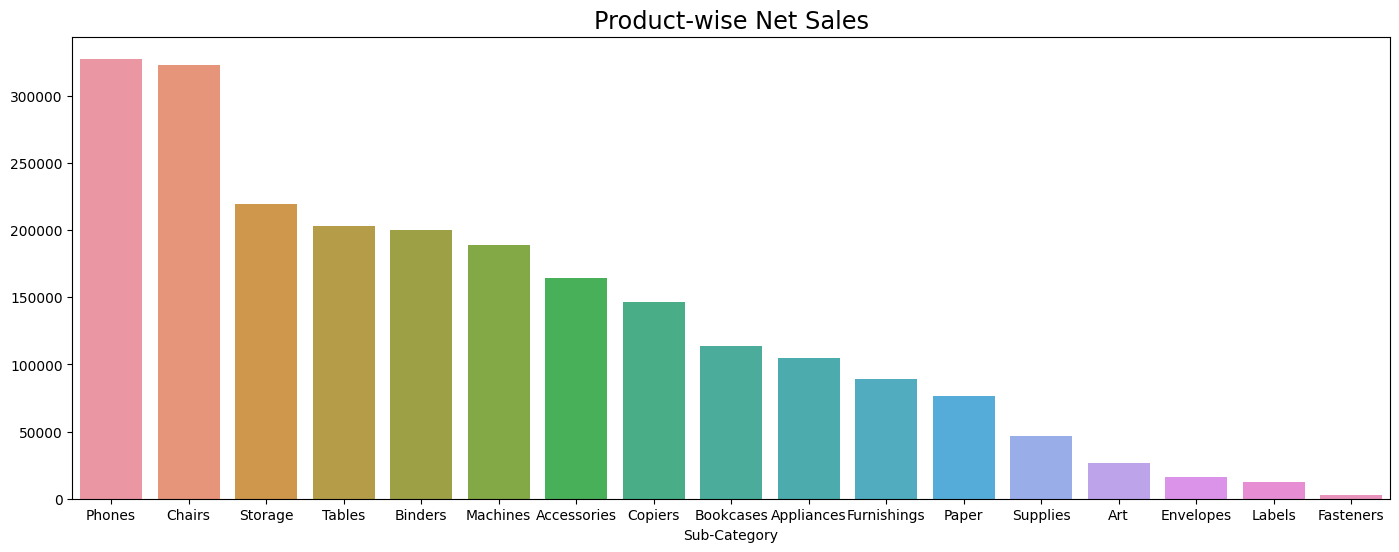

In [50]:
plt.figure(figsize=(17,6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values).set_title('Product-wise Net Sales', size='xx-large');

## 13. Region-wise Product Sales:
Compare product sales across different regions using grouped bar charts.

In [54]:
region_product_sales = superstore.groupby(['Region', 'Category'])['Sales'].sum().rename('Region-wise Product Sales')
region_product_sales

Region   Category       
Central  Furniture          160317.4622
         Office Supplies    163590.2430
         Technology         168739.2080
East     Furniture          206461.3880
         Office Supplies    199940.8110
         Technology         263116.5270
South    Furniture          116531.4800
         Office Supplies    124424.7710
         Technology         148195.2080
West     Furniture          245348.2455
         Office Supplies    217466.5090
         Technology         247404.9300
Name: Region-wise Product Sales, dtype: float64

In [79]:
region_product_sales.values

array([160317.4622, 163590.243 , 168739.208 , 206461.388 , 199940.811 ,
       263116.527 , 116531.48  , 124424.771 , 148195.208 , 245348.2455,
       217466.509 , 247404.93  ])

In [90]:
region_product_sales.unstack()

Category,Furniture,Office Supplies,Technology
Region,,,
Central,160317.4622,163590.243,168739.208
East,206461.3880,199940.811,263116.527
South,116531.4800,124424.771,148195.208
West,245348.2455,217466.509,247404.930


In [126]:
data = region_product_sales.unstack().reset_index()
data.columns.set_names('', inplace=True)
melted_data = data.melt(id_vars='Region', var_name='Product', value_name='Sales')
melted_data

,Region,Product,Sales
0,Central,Furniture,160317.4622
1,East,Furniture,206461.3880
2,South,Furniture,116531.4800
3,West,Furniture,245348.2455
4,Central,Office Supplies,163590.2430
5,East,Office Supplies,199940.8110
6,South,Office Supplies,124424.7710
7,West,Office Supplies,217466.5090
8,Central,Technology,168739.2080
9,East,Technology,263116.5270


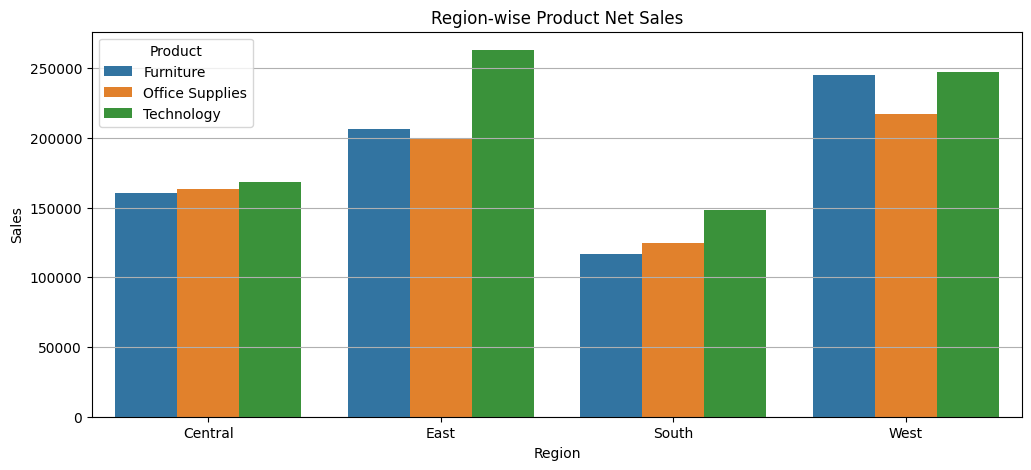

In [134]:
plt.figure(figsize=(12,5))
plt.grid(True)
sns.barplot(data=melted_data, x='Region', y='Sales', hue='Product').set_title('Region-wise Product Net Sales');

## 14. Document Findings:
Summarize key findings from both univariate and bivariate analyses. Highlight any notable trends or insights.

1. The maximum sale is 22638.48 & minimum is 0.44
2. The maximum number of sales fall below than 5000 and very rare sale crosses above
3. Zero to 95th percentile sales value fall under 1000
4. The maximum monthly sale was in December 2017 and November 2018
5. The minimum monthly sale was in February 2015
6. There's a positive trend and a seasonality pattern in sales
7. There are lot of outliers in sales(i.e. the data is very right skewed)
8. Technology category have the maximum net sale, shares 37% of total sales
9. Overall growth of quarterly sales from year 2017 to 2019 with some fluctuations
10. Sales growth increases from 2017 to 2019 and then declines from year 2019 to 2020
11. West has the highest total sales and South has the lowest
12. Consumer segment produces the highest sales while Home Office shows lowest
13. Standard class shipping mode produces highest total sales while Same Day shipping mode produces lowest
14. Both Phones and Chairs products produces highest total sales while Fastner shows lowest
15. In East region maximum sales was produced by Technology products
16. In South region minimum sales was produced by urniture products

___
# ___END OF PROJECT___